**Lab 4, Task 3  Sverdlyk Ivan, FB-51mp.**
Для виконання даної частини лабораторної роботи обрав завдання b-c.


Частина 1. Знайшов українські мовні моделі, навів приклади роботи з ними (через pipeline) на завданнях: zero-shot-classification, summarization, translation.


In [1]:
# Zero-Shot-Classification. Використав модель MoritzLaurer/mDeBERTa-v3-base-mnli-xnli, яка чудово розуміє українську мову

from transformers import pipeline
# завантажую пайплайн для класифікації
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli", device=0)
text_to_classify = "Динамо Київ здобуло важливу перемогу у матчі кваліфікації Ліги Чемпіонів."
candidate_labels = ["політика", "спорт", "економіка", "технології"]
result = classifier(text_to_classify, candidate_labels, multi_label=False)
print(f"Текст: {text_to_classify}")
print(f"Категорія: {result['labels'][0]} (впевненість: {result['scores'][0]:.2f})")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

Device set to use cuda:0


Текст: Динамо Київ здобуло важливу перемогу у матчі кваліфікації Ліги Чемпіонів.
Категорія: спорт (впевненість: 0.66)


In [2]:
# Summarization. Використав модель csebuetnlp/mT5_multilingual_XLSum, яка була донавчена на датасеті новин, що включає українську мову (BBC Ukrainian)
summarizer = pipeline("summarization", model="csebuetnlp/mT5_multilingual_XLSum", device=0)
article_text = """
Штучний інтелект (ШІ) — це галузь комп'ютерних наук, що займається розробкою інтелектуальних машин, здатних виконувати завдання, які зазвичай потребують людського інтелекту. До таких завдань належать розпізнавання мови, прийняття рішень, переклад між мовами та візуальне сприйняття. Останніми роками ШІ досяг значного прогресу завдяки збільшенню обчислювальних потужностей та наявності великих обсягів даних. Це дозволило створити такі системи, як ChatGPT, які можуть вести діалог на рівні, близькому до людського.
"""
# min_length та max_length регулюють розмір стислого тексту
summary = summarizer(article_text, max_length=50, min_length=10, do_sample=False)
print("Оригінал (довжина):", len(article_text))
print("-" * 30)
print("Сумаризація:", summary[0]['summary_text'])

config.json:   0%|          | 0.00/730 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.12/dist-packages/transformers/convert_slow_tokenizer.py:566: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Device set to use cuda:0


Оригінал (довжина): 516
------------------------------
Сумаризація: Що означає штучний інтелект?


In [3]:
# Translation. Я обрав модель Helsinki-NLP, аби спробувати переклад з української на англійську мову.
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-uk-en", device=0)
uk_text = "Сьогодні є декілька вільних годин зі світлом."
translation = translator(uk_text)
print(f"UA: {uk_text}")
print(f"EN: {translation[0]['translation_text']}")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/305M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/305M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/809k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0


UA: Сьогодні є декілька вільних годин зі світлом.
EN: Today, there's a couple of free hours with light.


Частина 2. Генерація зображень з Hugging Face Diffusers. Зробив задачу Text-to-Image, оскільки для мене вона є найбільш цікавою.

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Генерую зображення


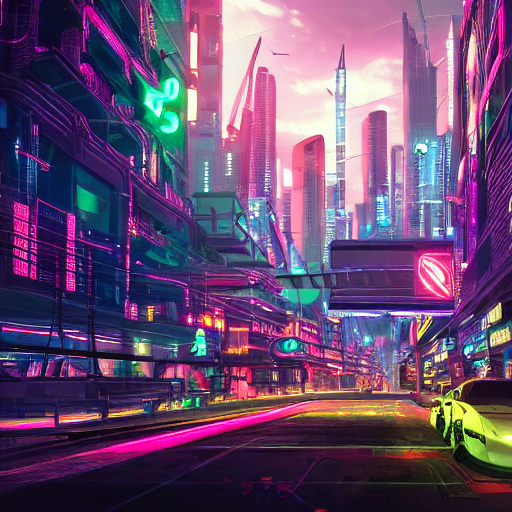

In [4]:
# Використав найбільш стабільний варіант Stable Diffusion для колабу.
import torch
from diffusers import StableDiffusionPipeline
# Завантажив модель
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")
# Створив prompt
prompt = "A futuristic cyberpunk city with neon lights inside a glass sphere, high detail, 8k resolution, cinematic lighting"
print("Генерую зображення")
pipe.set_progress_bar_config(disable=True)
image = pipe(prompt).images[0]
# Відображення результату
display(image)